In [1]:
!pip uninstall scipy
!pip install scipy==1.1.0


Found existing installation: scipy 1.1.0
Uninstalling scipy-1.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.1.0
  Using cached scipy-1.1.0-cp37-cp37m-manylinux1_x86_64.whl (31.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.2.25 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
cd drive/MyDrive/MP2-bigdata/


/content/drive/.shortcut-targets-by-id/1163mhhRzGaDZe19zFuymtMoR3xx-tfIo/MP2-bigdata


# REQUIREMENT 1: CHAMPION RATES

In [5]:
df = pd.read_csv('analysis_outputs/Req1_champ_rates.csv').dropna().drop(['Unnamed: 0'], axis=1)
imgdf = pd.read_csv('data/complete_data/champion_classes_from_ddragon.csv').drop('Unnamed: 0', axis=1)
df  = df.merge(imgdf, on= 'championName')
df.head()

championId championName  ...                    class        image
0          51      Caitlyn  ...             ['Marksman']  Caitlyn.png
1           7      Leblanc  ...     ['Assassin', 'Mage']  Leblanc.png
2         711          Vex  ...                 ['Mage']      Vex.png
3          15        Sivir  ...             ['Marksman']    Sivir.png
4         234        Viego  ...  ['Assassin', 'Fighter']    Viego.png

[5 rows x 7 columns]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


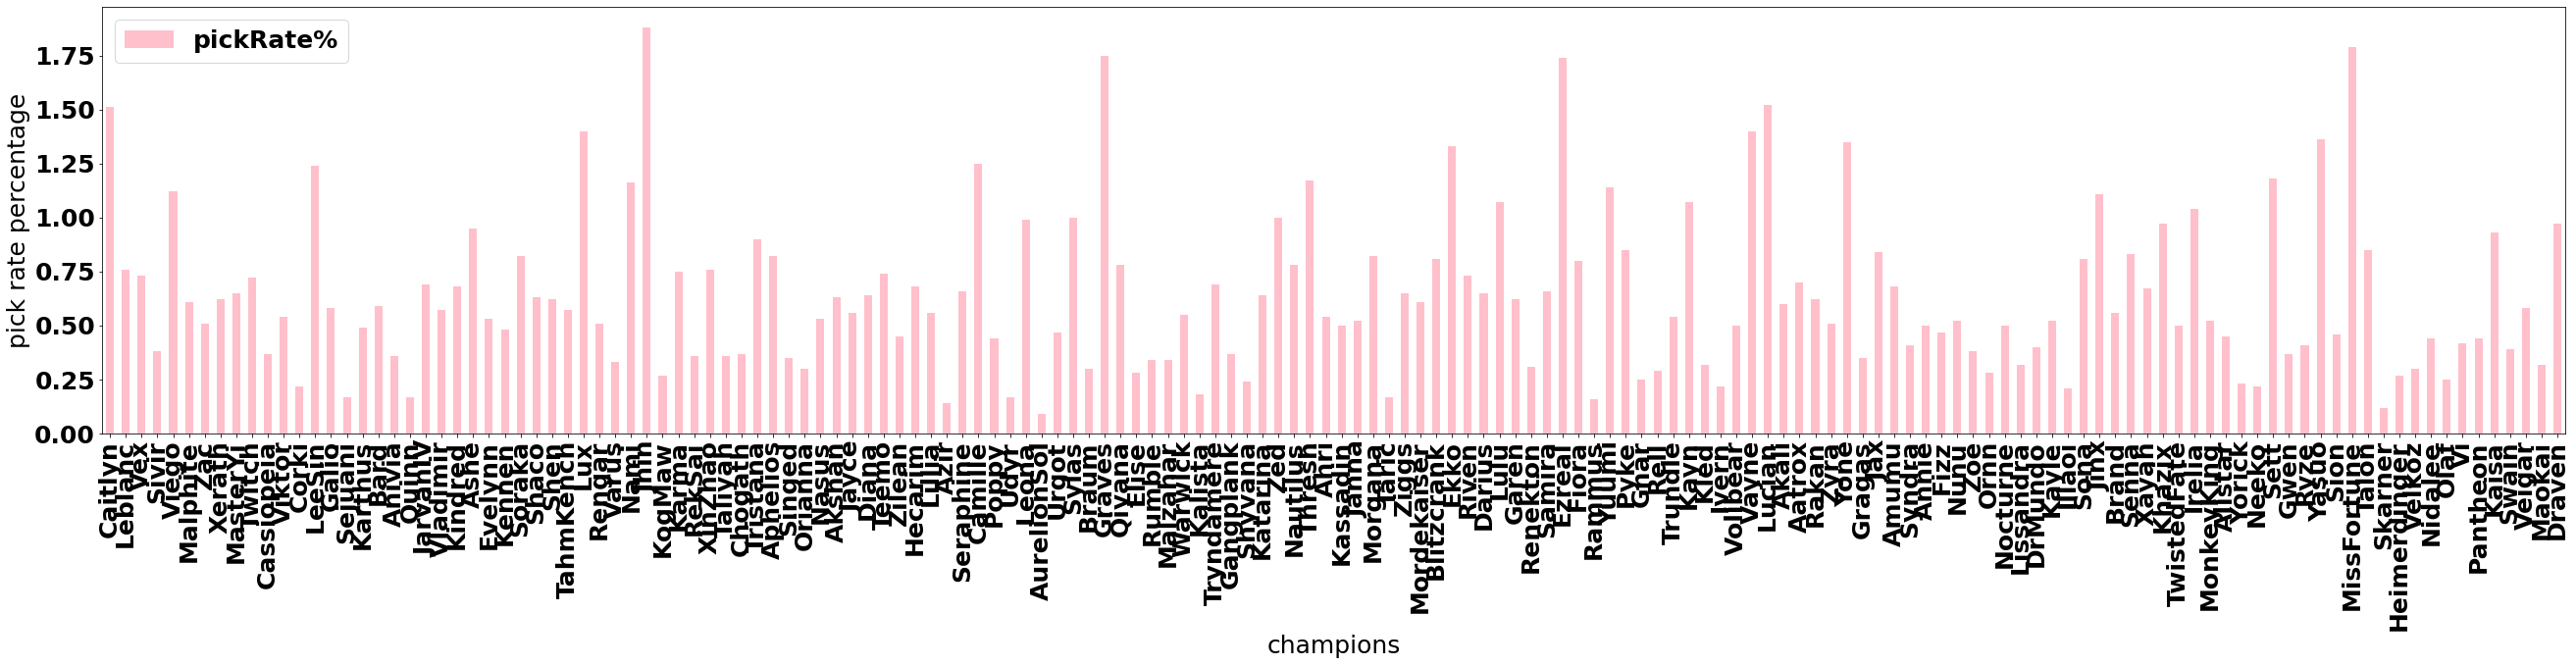

In [6]:
ax =df.plot(x='championName', y='pickRate%', kind="bar",figsize=(45,8), color ='pink')
plt.savefig('analysis_outputs/pickRate.png', dpi=300)
ax.set_xlabel("champions")
ax.set_ylabel("pick rate percentage")
plt.show()

In [7]:
# top 5 most picked champions
top5 = df.sort_values('pickRate%', ascending=False).iloc[:5]
top5

championId championName  ...                 class            image
34          202         Jhin  ...  ['Marksman', 'Mage']         Jhin.png
142          21  MissFortune  ...          ['Marksman']  MissFortune.png
63          104       Graves  ...          ['Marksman']       Graves.png
92           81       Ezreal  ...  ['Marksman', 'Mage']       Ezreal.png
105         236       Lucian  ...          ['Marksman']       Lucian.png

[5 rows x 7 columns]

In [8]:

def bar_plot_with_images(x,values, color, width, headers, spacing=0):
    title, x_lab, y_lab = headers
    fig, ax = plt.subplots(2,figsize=(18,10))

    ax[0].bar( x,values,  color = color, width= width)
    ax[0].set_title(title)
    ax[0].set_xlabel(x_lab)
    ax[0].set_ylabel(y_lab)

    def image_plot(heights, images, spacing=0):
        # Iterate through images and data, autoscaling the width to
        # the aspect ratio of the image
        for i, (height, img) in enumerate(zip(heights, images)):
            AR = img.shape[1] / img.shape[0]
            width = height * AR
            left = width*i + spacing*i
            right = left + width
            plt.imshow(img, extent=[left, right, 0, height])
        # Set x,y limits on plot window
        plt.xlim(0, right)
        plt.ylim(0, max(heights)*1.1)

    image_plot(values, images, spacing)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


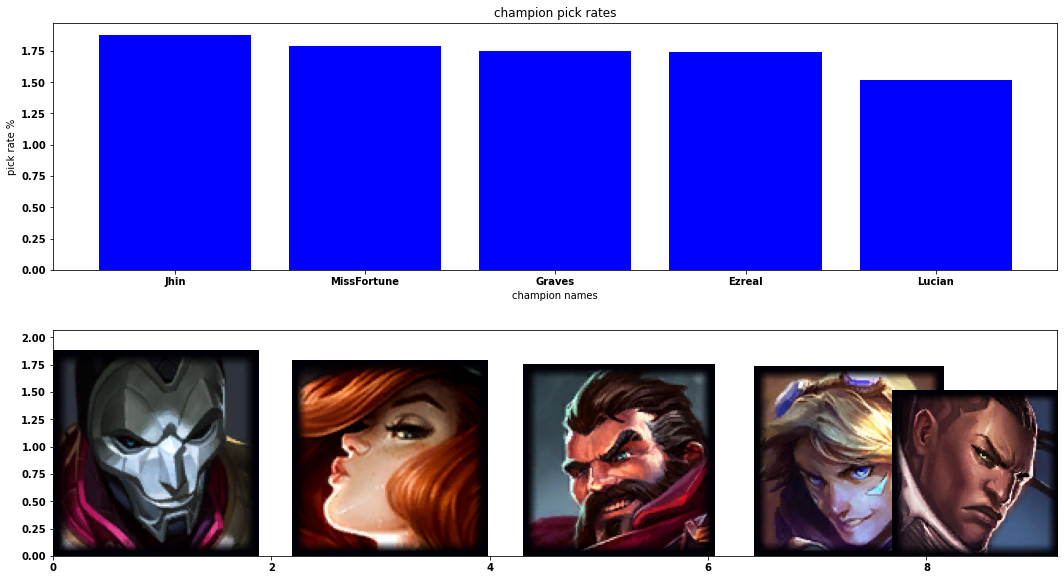

In [9]:
%matplotlib inline
from PIL import Image
from scipy.misc.pilutil import imread
import cv2
import warnings
warnings.filterwarnings("ignore")

x = top5['championName']
values = top5['pickRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/champion_images/'+i) for i in images]

bar_plot_with_images(x,values, 'b', 0.8, ['champion pick rates', 'champion names', 'pick rate %'],0.4)
plt.savefig('analysis_outputs/top5_picked_champs.png', dpi=300)


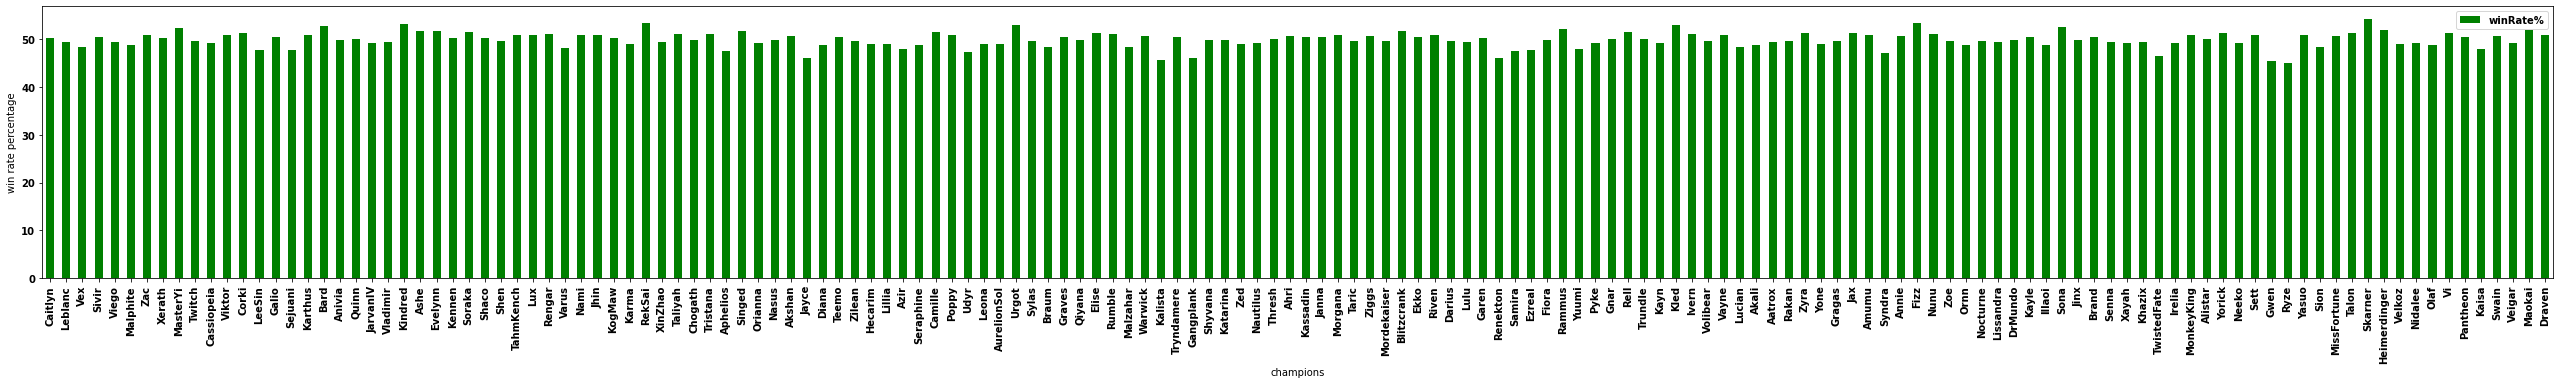

In [10]:
ax =df.plot(x='championName', y='winRate%', kind="bar",figsize=(45,5), color ='green')
plt.savefig('analysis_outputs/champ_winRates.png', dpi=300)
ax.set_xlabel("champions")
ax.set_ylabel("win rate percentage")
plt.show()

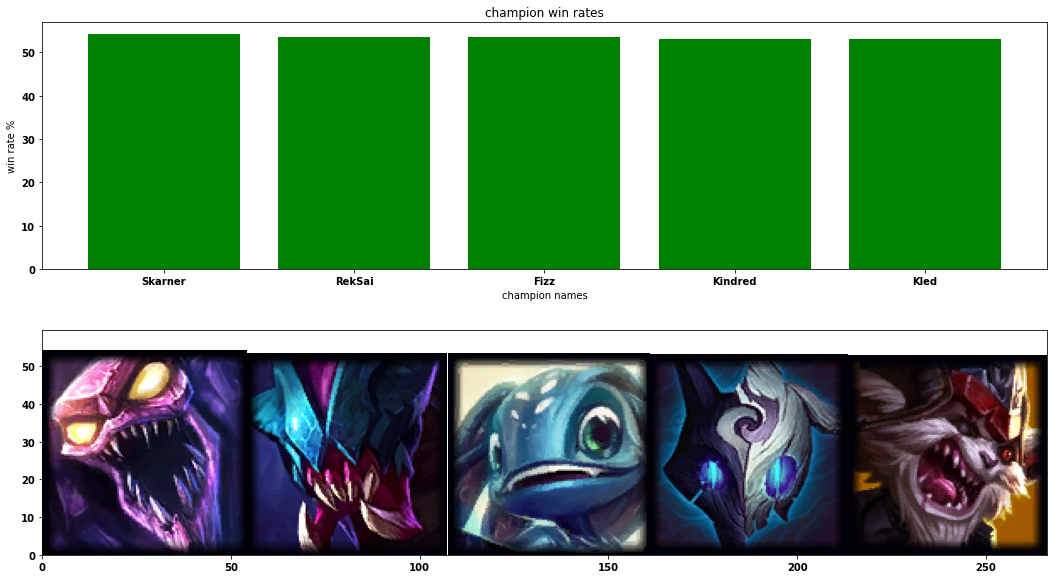

In [11]:
top5 = df.sort_values('winRate%', ascending=False).iloc[:5]

x = top5['championName']
values = top5['winRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/champion_images/'+i) for i in images]

bar_plot_with_images(x,values, 'g', 0.8,['champion win rates', 'champion names', 'win rate %'],0.3)
plt.savefig('analysis_outputs/top5_winning_champs.png', dpi=300)


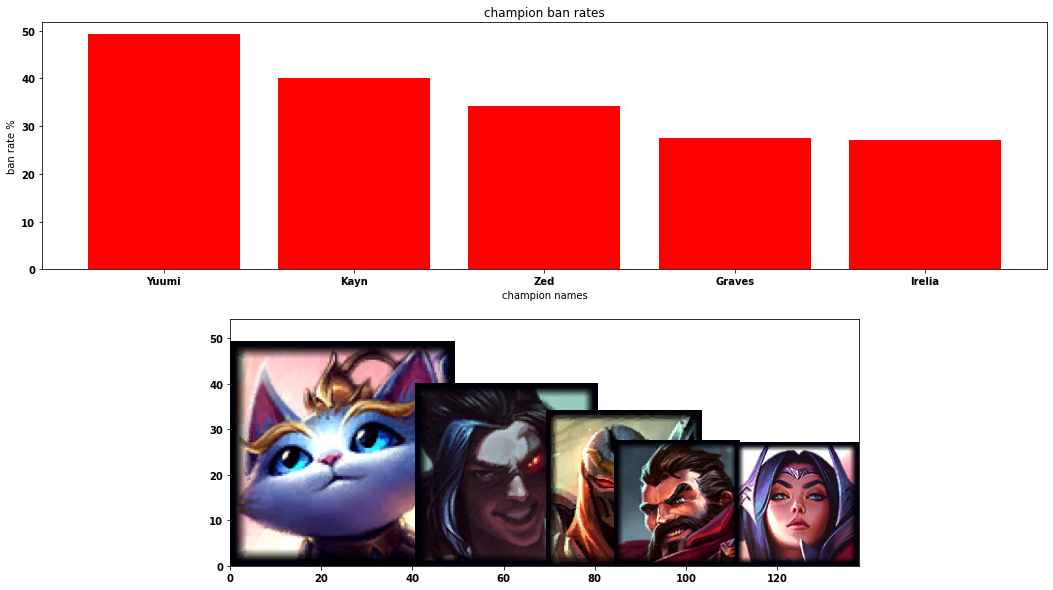

In [12]:
top5 = df.sort_values('banRate%', ascending=False).iloc[:5]

x = top5['championName']
values = top5['banRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/champion_images/'+i) for i in images]

bar_plot_with_images(x,values, 'r', 0.8, ['champion ban rates', 'champion names', 'ban rate %'],0.5)
plt.savefig('analysis_outputs/top5_winning_champs.png', dpi=300)


# REQUIREMENT 2: CHAMPION SYNERGY

In [13]:
df = pd.read_csv('analysis_outputs/req2_champ_synergies.csv').dropna().drop(['Unnamed: 0'], axis=1).sort_values('SynergyScore%', ascending=False)
df['championPairs_list'] = df['championPairs'].str.strip('[]').str.strip('"').str.split(',')
df[['ch1', 'ch2']] = pd.DataFrame(df['championPairs_list'].tolist(), index=df.index)
df.drop('championPairs_list', axis=1, inplace=True)

df.head()

championPairs  SynergyScore%          ch1         ch2
4957  [AurelionSol, Rammus]          100.0  AurelionSol      Rammus
1692       [Karthus, Sivir]          100.0      Karthus       Sivir
3728     [Amumu, TahmKench]          100.0        Amumu   TahmKench
1687         [Nasus, Taric]          100.0        Nasus       Taric
3727          [Gragas, Lux]          100.0       Gragas         Lux

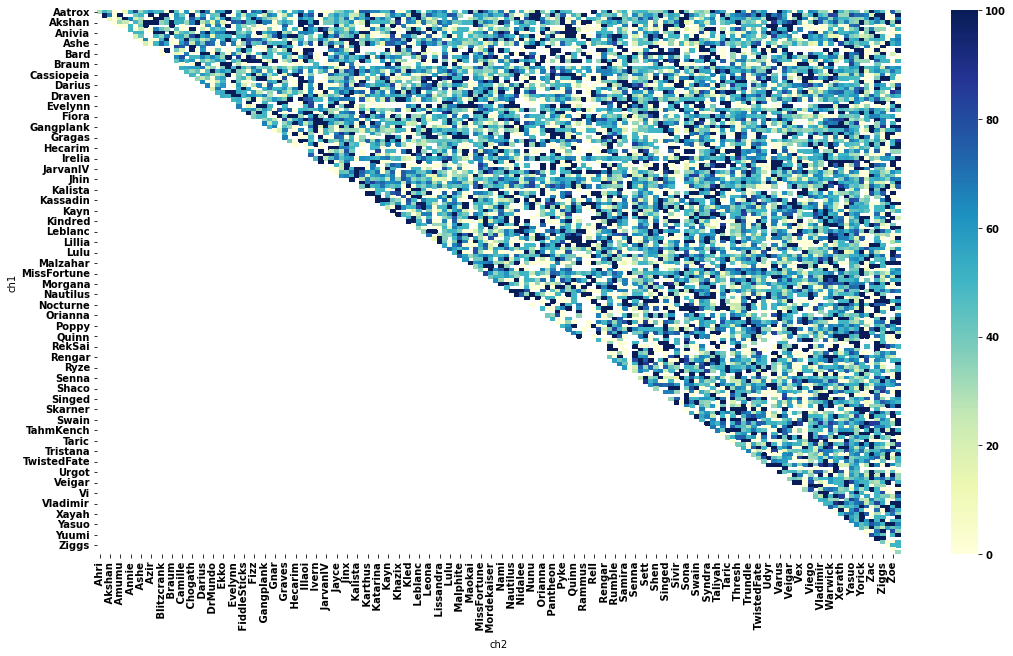

<Figure size 432x288 with 0 Axes>

In [14]:
# visualize synergy as heat map
result = df.pivot(index='ch1', columns='ch2', values='SynergyScore%')
plt.figure(figsize=[18,10])
sn.heatmap(result, annot=False, vmin=0,vmax=100, cmap="YlGnBu")
plt.show()
plt.savefig('analysis_outputs/champ_synergy_heatmap.png', dpi=300)


In [15]:
# get the top 1000 best synergizing pairs
top5 = df.sort_values('SynergyScore%', ascending=False).iloc[:5]
top5

championPairs  SynergyScore%          ch1      ch2
4957  [AurelionSol, Rammus]          100.0  AurelionSol   Rammus
6443     [Tryndamere, Udyr]          100.0   Tryndamere     Udyr
864        [DrMundo, Neeko]          100.0      DrMundo    Neeko
9457         [Lulu, Yorick]          100.0         Lulu   Yorick
5503     [Katarina, Rumble]          100.0     Katarina   Rumble

In [16]:
[df.iloc[0]['ch1']+'.png', df.iloc[1]['ch1']+'.png' ]


['AurelionSol.png', 'Karthus.png']

In [17]:
str([1,2,3])

'[1, 2, 3]'

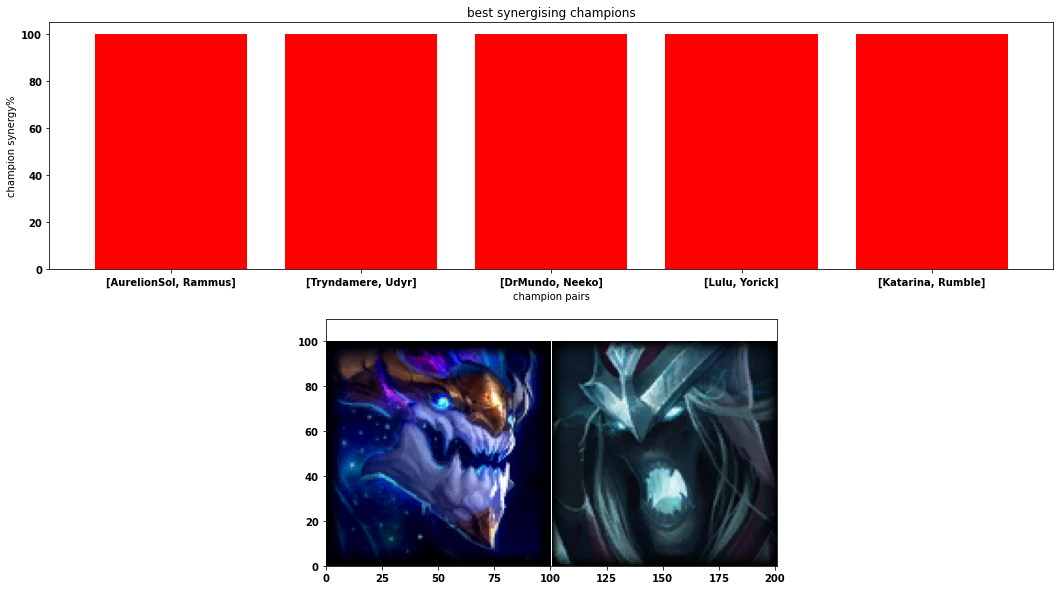

In [18]:
x = top5['championPairs']
values = top5['SynergyScore%']
ims= [top5.iloc[0]['ch1']+'.png', df.iloc[1]['ch1']+'.png' ]

images = [imread('data/complete_data/data_dragon/champion_images/'+i) for i in ims]

bar_plot_with_images(x, values, 'r', 0.8, ['best synergising champions', 'champion pairs', 'champion synergy%'],0.8)
#plt.title(f'best synergy duo: Garen & Akshan')

plt.savefig('analysis_outputs/best_synergy_champs.png', dpi=300)


In [19]:
# least synergyising champions (counter)
top5 = df.sort_values('SynergyScore%').iloc[:10]
top5

championPairs  SynergyScore%         ch1            ch2
9776                [Rakan, Zed]            0.0       Rakan            Zed
3935  [Blitzcrank, FiddleSticks]            0.0  Blitzcrank   FiddleSticks
3928           [Renekton, Yuumi]            0.0    Renekton          Yuumi
5925            [Corki, Hecarim]            0.0       Corki        Hecarim
5926        [Lissandra, Taliyah]            0.0   Lissandra        Taliyah
3916             [Sivir, Viktor]            0.0       Sivir         Viktor
3912             [Annie, Singed]            0.0       Annie         Singed
3911            [Gragas, Singed]            0.0      Gragas         Singed
5935          [Trundle, XinZhao]            0.0     Trundle        XinZhao
5892              [Annie, Ivern]            0.0       Annie          Ivern

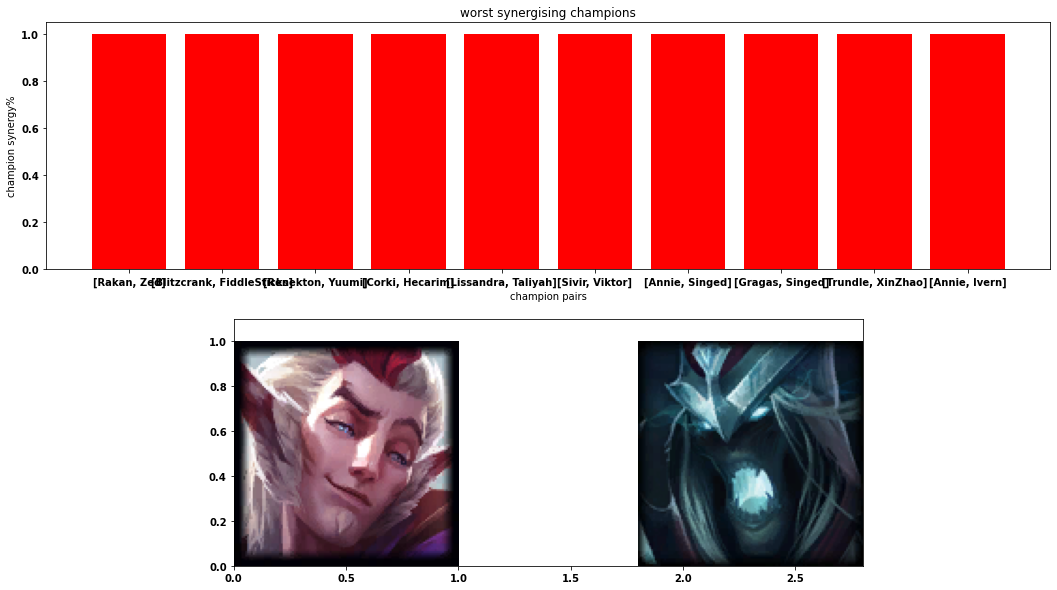

In [20]:
x = top5['championPairs']
values = top5['SynergyScore%']
ims= [top5.iloc[0]['ch1']+'.png', df.iloc[1]['ch1']+'.png' ]

images = [imread('data/complete_data/data_dragon/champion_images/'+i) for i in ims]

bar_plot_with_images(x, values+1, 'r', 0.8, ['worst synergising champions', 'champion pairs', 'champion synergy%'],0.8)

plt.savefig('analysis_outputs/worst_synergy_champs.png', dpi=300)


In [21]:
df = pd.read_csv('analysis_outputs/req3_item_rates.csv').dropna().drop(['Unnamed: 0'], axis=1)
imgdf = pd.read_csv('data/complete_data/item_names_from_ddragon.csv').drop('Unnamed: 0', axis=1)
df  = df.merge(imgdf, on= 'itemIndex')
df.head()

itemIndex       itemName  ...           name     image
0       3858   Relic Shield  ...   Relic Shield  3858.png
1       3121   Fimbulwinter  ...   Fimbulwinter  3121.png
2       3057          Sheen  ...          Sheen  3057.png
3       1043    Recurve Bow  ...    Recurve Bow  1043.png
4       3179  Umbral Glaive  ...  Umbral Glaive  3179.png

[5 rows x 6 columns]

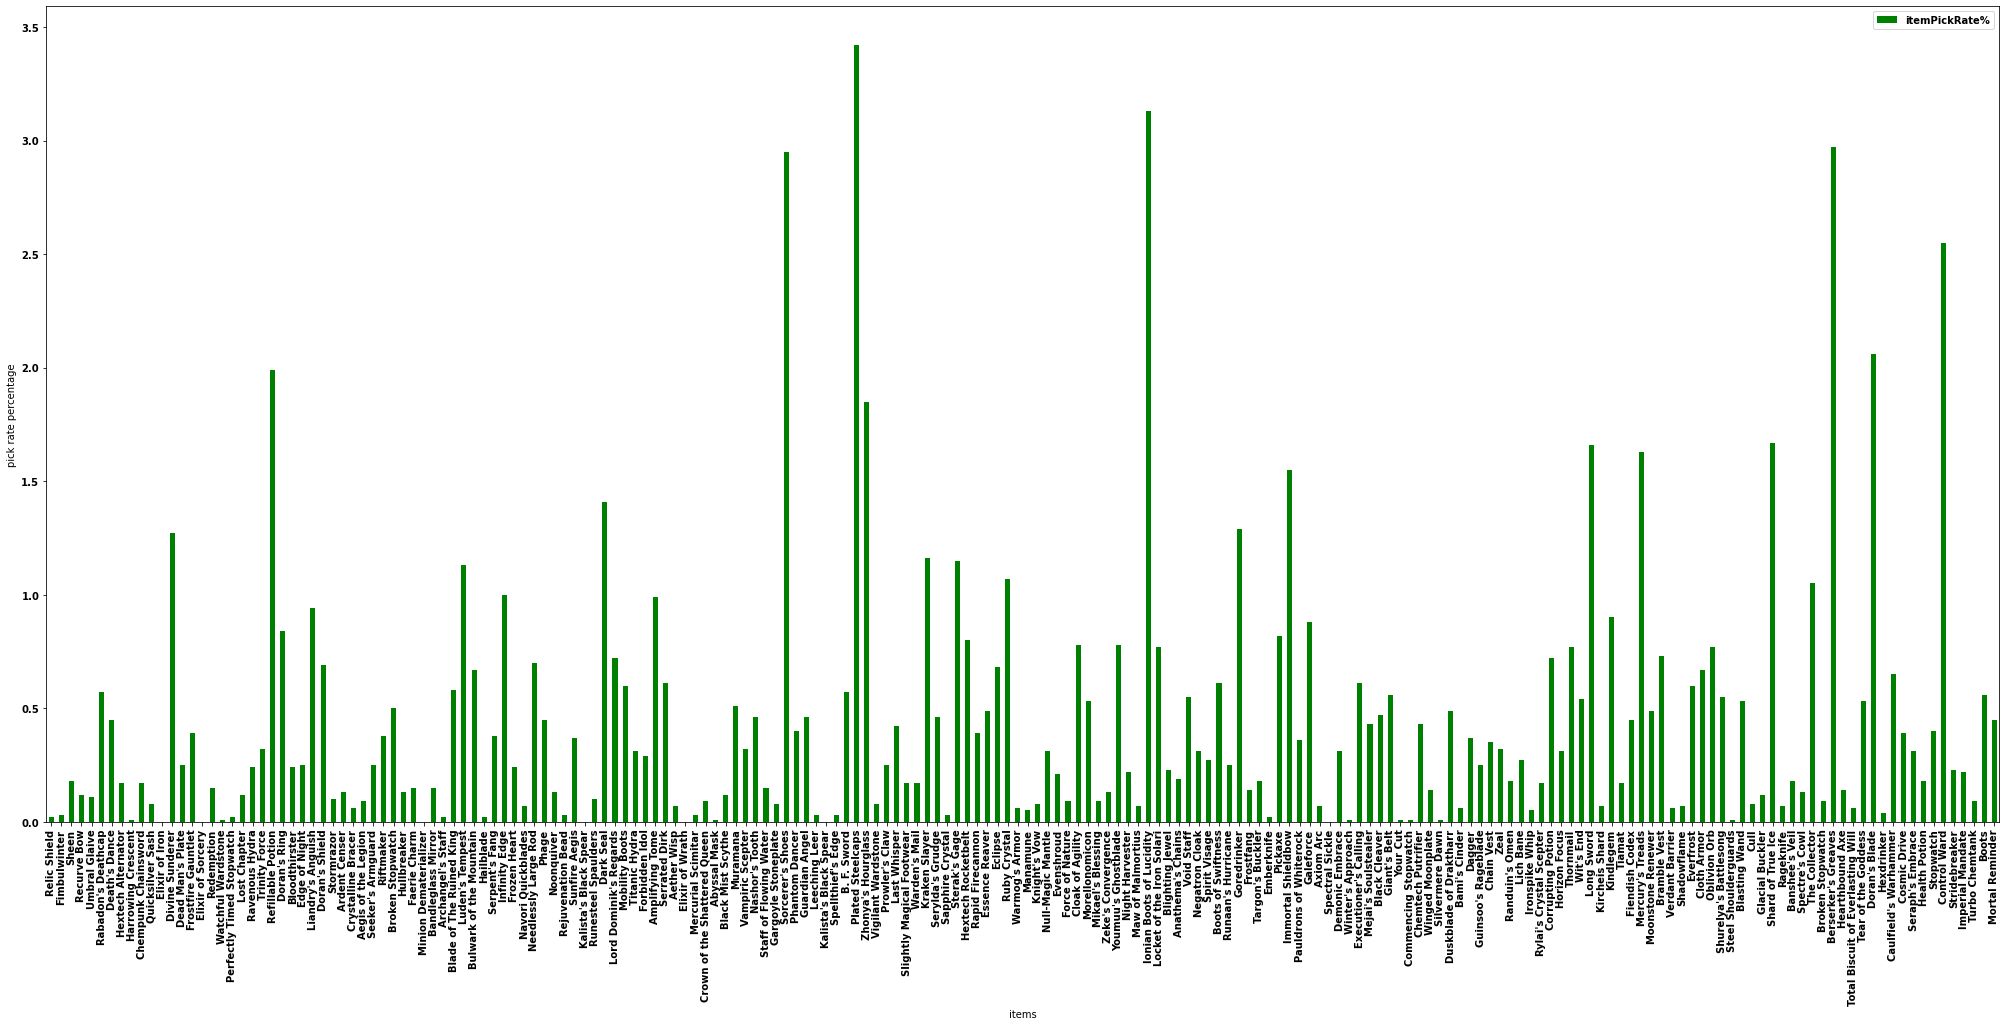

In [22]:
ax =df.plot(x='itemName', y='itemPickRate%', kind="bar",figsize=(35,15), color ='green')
plt.savefig('analysis_outputs/item_pickRate.png', dpi=300)
ax.set_xlabel("items")
ax.set_ylabel("pick rate percentage")
plt.show()

In [23]:
# top 5 most picked champions
top5 = df.sort_values('itemPickRate%', ascending=False).iloc[:5]
top5

itemIndex                  itemName  ...                      name     image
80        3047          Plated Steelcaps  ...          Plated Steelcaps  3047.png
109       3158  Ionian Boots of Lucidity  ...  Ionian Boots of Lucidity  3158.png
177       3006       Berserker's Greaves  ...       Berserker's Greaves  3006.png
73        3020          Sorcerer's Shoes  ...          Sorcerer's Shoes  3020.png
188       2055              Control Ward  ...              Control Ward  2055.png

[5 rows x 6 columns]

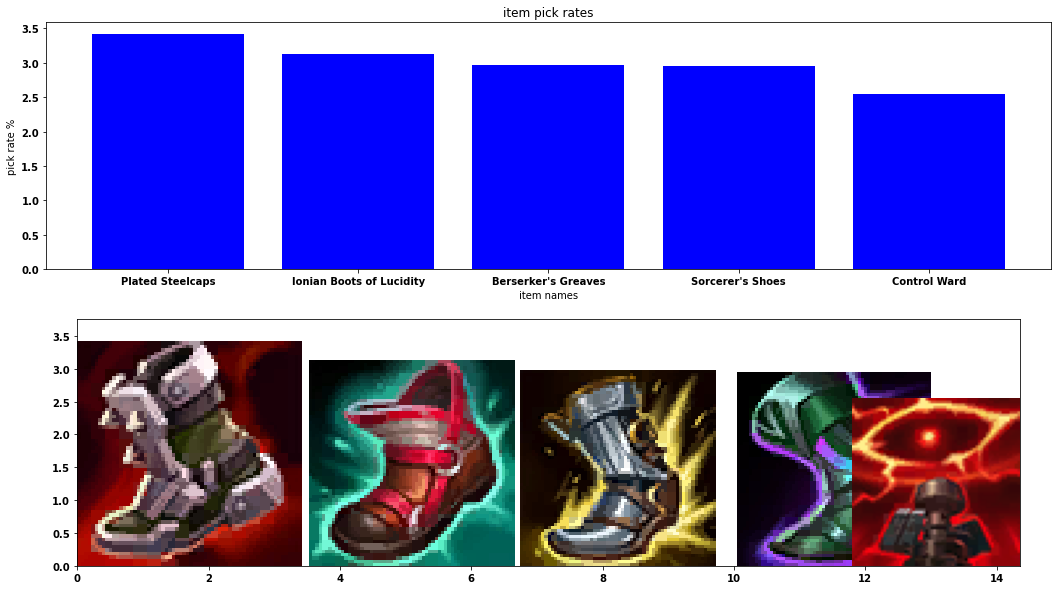

In [24]:
x = top5['itemName']
values = top5['itemPickRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'b', 0.8, ['item pick rates', 'item names', 'pick rate %'],0.4)
plt.savefig('analysis_outputs/top5_picked_items.png', dpi=300)


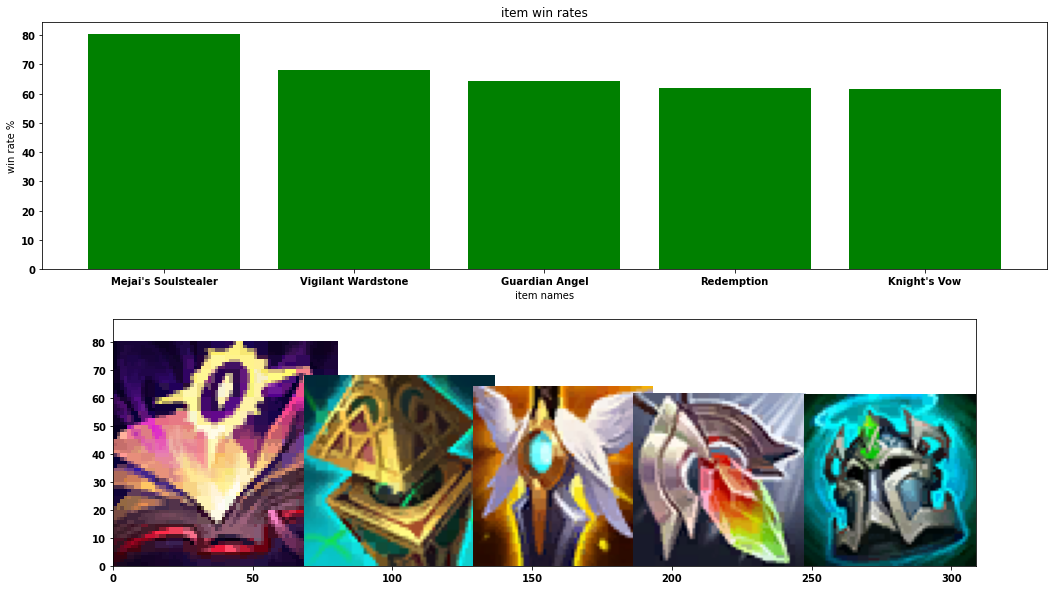

In [25]:
top5 = df.sort_values('itemWinRate%', ascending=False).iloc[:5]

x = top5['itemName']
values = top5['itemWinRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'g', 0.8,['item win rates', 'item names', 'win rate %'],0.3)
plt.savefig('analysis_outputs/top5_winning_items.png', dpi=300)


In [26]:
df = pd.read_csv('analysis_outputs/req3_item_rates.csv').dropna().drop(['Unnamed: 0'], axis=1)
imgdf = pd.read_csv('data/complete_data/item_names_from_ddragon.csv').drop('Unnamed: 0', axis=1)
df  = df.merge(imgdf, on= 'itemIndex')
df.head()

itemIndex       itemName  ...           name     image
0       3858   Relic Shield  ...   Relic Shield  3858.png
1       3121   Fimbulwinter  ...   Fimbulwinter  3121.png
2       3057          Sheen  ...          Sheen  3057.png
3       1043    Recurve Bow  ...    Recurve Bow  1043.png
4       3179  Umbral Glaive  ...  Umbral Glaive  3179.png

[5 rows x 6 columns]

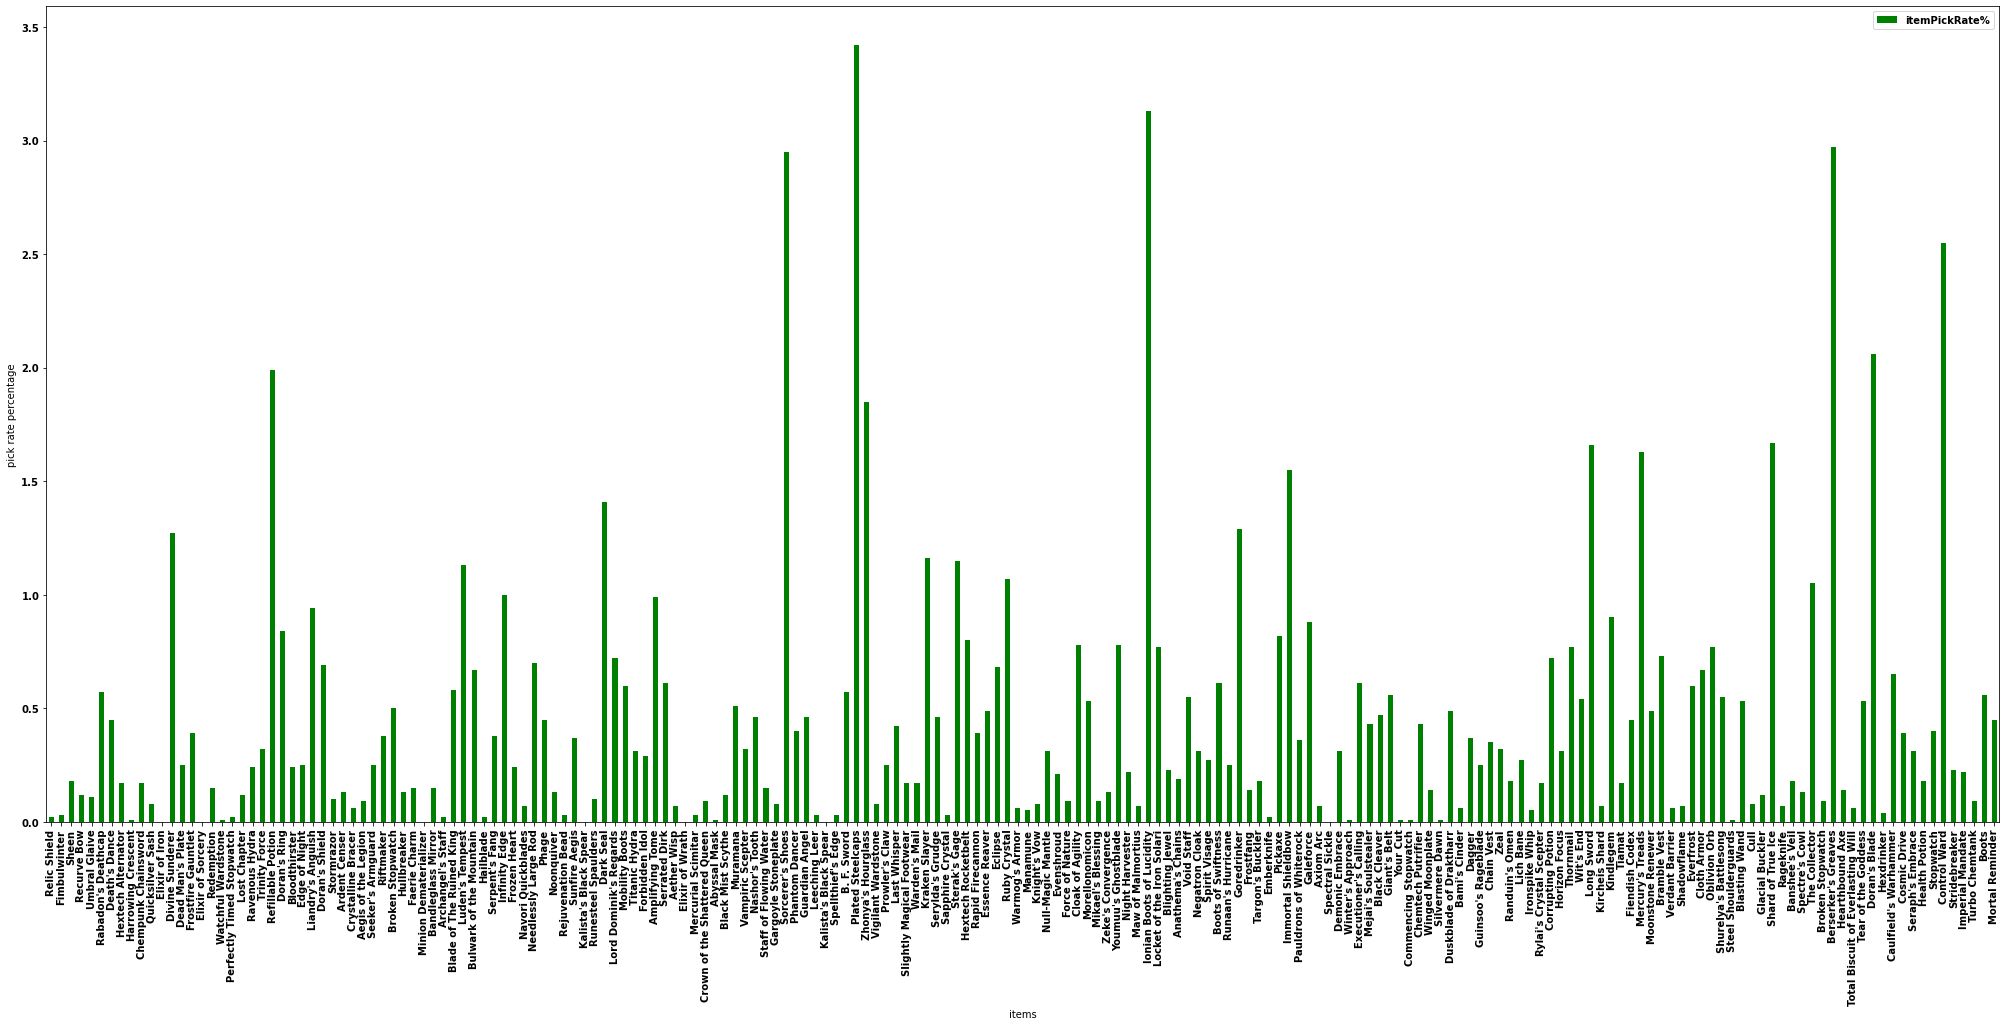

In [27]:
ax =df.plot(x='itemName', y='itemPickRate%', kind="bar",figsize=(35,15), color ='green')
plt.savefig('analysis_outputs/item_pickRate.png', dpi=300)
ax.set_xlabel("items")
ax.set_ylabel("pick rate percentage")
plt.show()

In [28]:
# top 5 most picked champions
top5 = df.sort_values('itemPickRate%', ascending=False).iloc[:5]
top5

itemIndex                  itemName  ...                      name     image
80        3047          Plated Steelcaps  ...          Plated Steelcaps  3047.png
109       3158  Ionian Boots of Lucidity  ...  Ionian Boots of Lucidity  3158.png
177       3006       Berserker's Greaves  ...       Berserker's Greaves  3006.png
73        3020          Sorcerer's Shoes  ...          Sorcerer's Shoes  3020.png
188       2055              Control Ward  ...              Control Ward  2055.png

[5 rows x 6 columns]

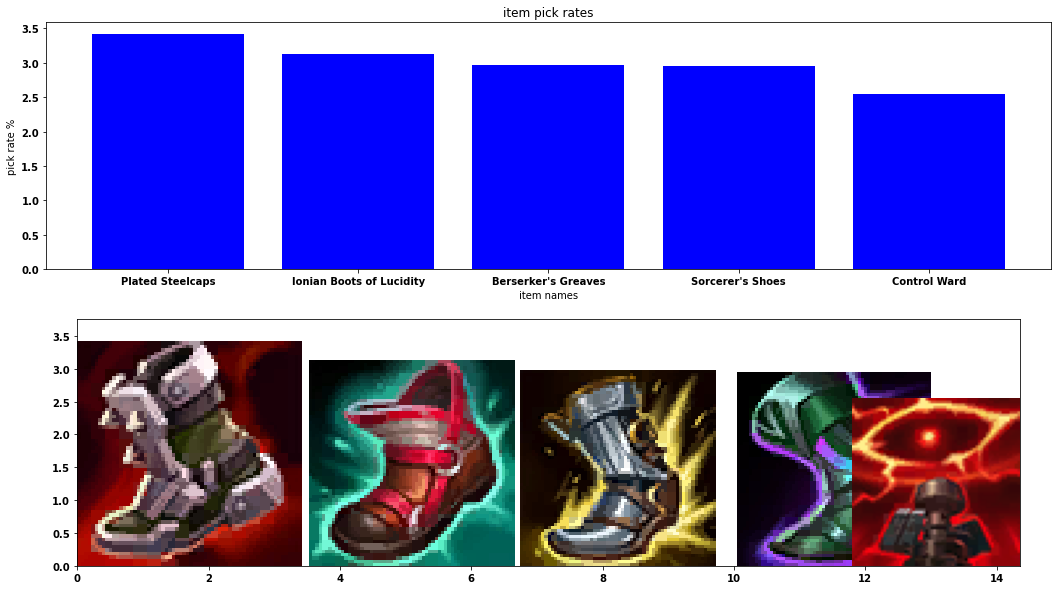

In [29]:
x = top5['itemName']
values = top5['itemPickRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'b', 0.8, ['item pick rates', 'item names', 'pick rate %'],0.4)
plt.savefig('analysis_outputs/top5_picked_items.png', dpi=300)


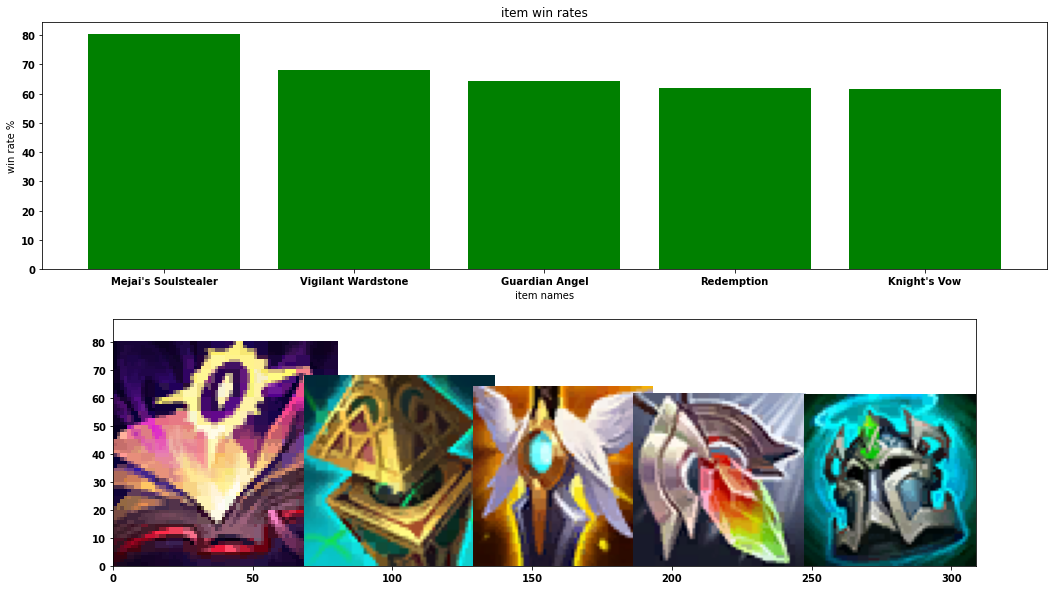

In [30]:
top5 = df.sort_values('itemWinRate%', ascending=False).iloc[:5]

x = top5['itemName']
values = top5['itemWinRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'g', 0.8,['item win rates', 'item names', 'win rate %'],0.3)
plt.savefig('analysis_outputs/top5_winning_items.png', dpi=300)


# REQUIREMENT 3: ITEM RATES

In [ ]:
df = pd.read_csv('analysis_outputs/req3_item_rates.csv').dropna().drop(['Unnamed: 0'], axis=1)
imgdf = pd.read_csv('data/complete_data/item_names_from_ddragon.csv').drop('Unnamed: 0', axis=1)
df  = df.merge(imgdf, on= 'itemIndex')
df.head()

itemIndex       itemName  ...           name     image
0       3858   Relic Shield  ...   Relic Shield  3858.png
1       3121   Fimbulwinter  ...   Fimbulwinter  3121.png
2       3057          Sheen  ...          Sheen  3057.png
3       1043    Recurve Bow  ...    Recurve Bow  1043.png
4       3179  Umbral Glaive  ...  Umbral Glaive  3179.png

[5 rows x 6 columns]

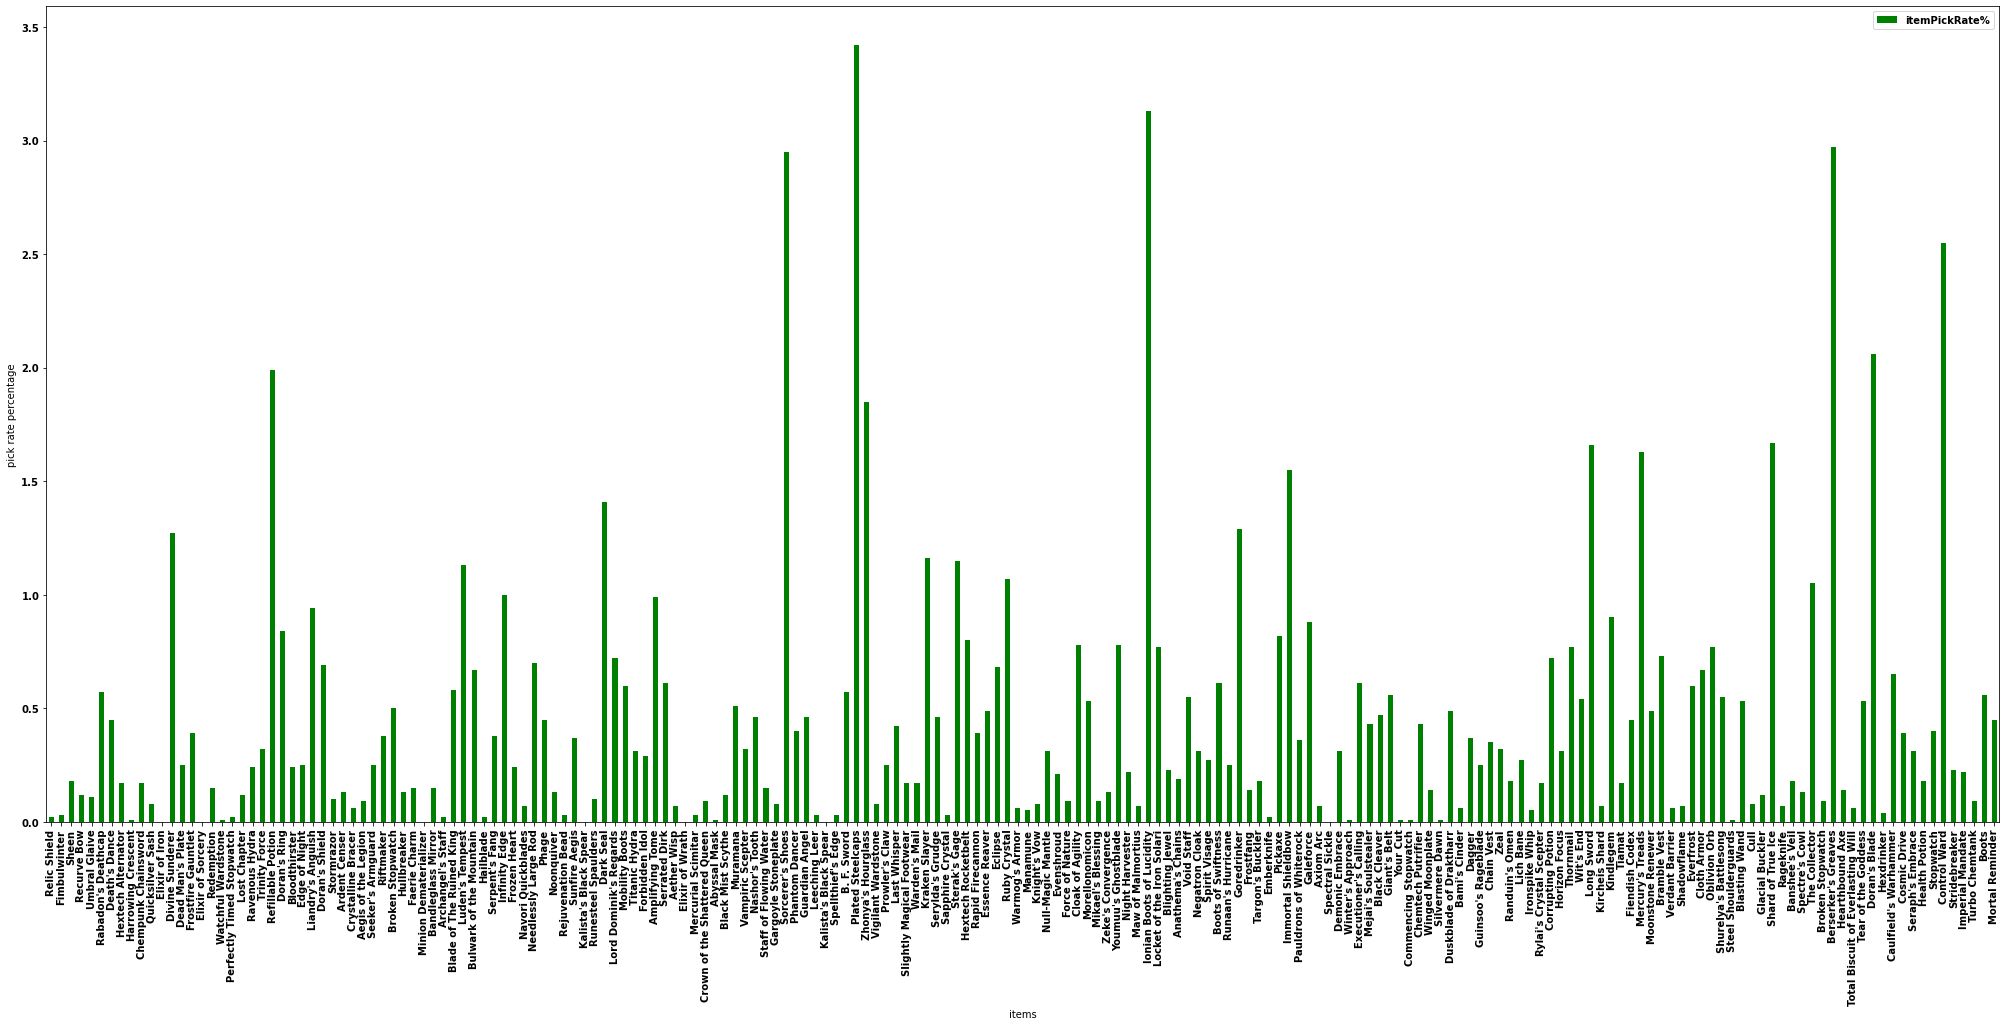

In [ ]:
ax =df.plot(x='itemName', y='itemPickRate%', kind="bar",figsize=(35,15), color ='green')
plt.savefig('analysis_outputs/item_pickRate.png', dpi=300)
ax.set_xlabel("items")
ax.set_ylabel("pick rate percentage")
plt.show()

In [ ]:
# top 5 most picked champions
top5 = df.sort_values('itemPickRate%', ascending=False).iloc[:5]
top5

itemIndex                  itemName  ...                      name     image
80        3047          Plated Steelcaps  ...          Plated Steelcaps  3047.png
109       3158  Ionian Boots of Lucidity  ...  Ionian Boots of Lucidity  3158.png
177       3006       Berserker's Greaves  ...       Berserker's Greaves  3006.png
73        3020          Sorcerer's Shoes  ...          Sorcerer's Shoes  3020.png
188       2055              Control Ward  ...              Control Ward  2055.png

[5 rows x 6 columns]

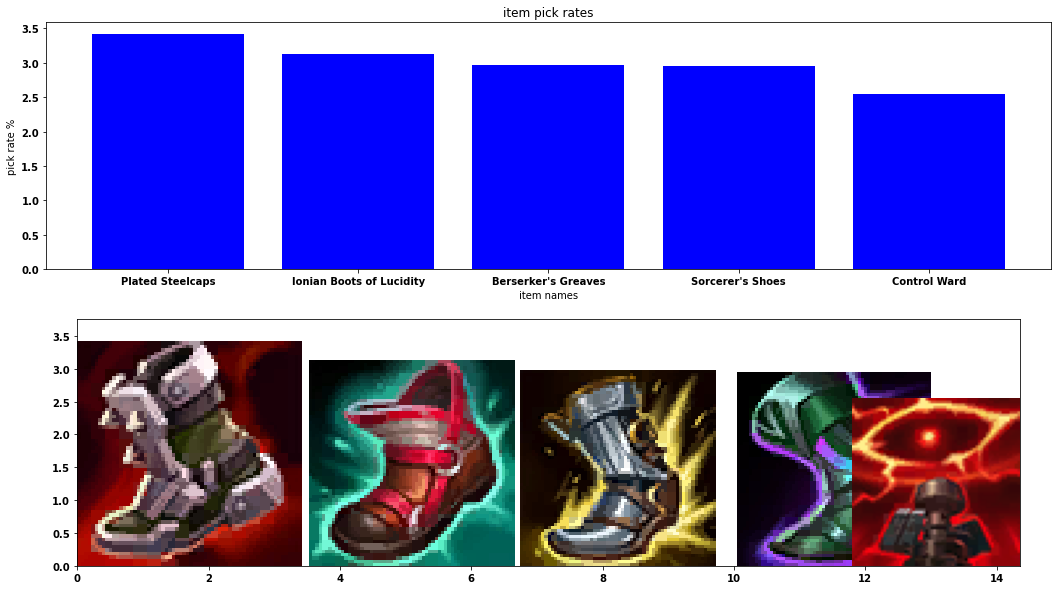

In [ ]:
x = top5['itemName']
values = top5['itemPickRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'b', 0.8, ['item pick rates', 'item names', 'pick rate %'],0.4)
plt.savefig('analysis_outputs/top5_picked_items.png', dpi=300)


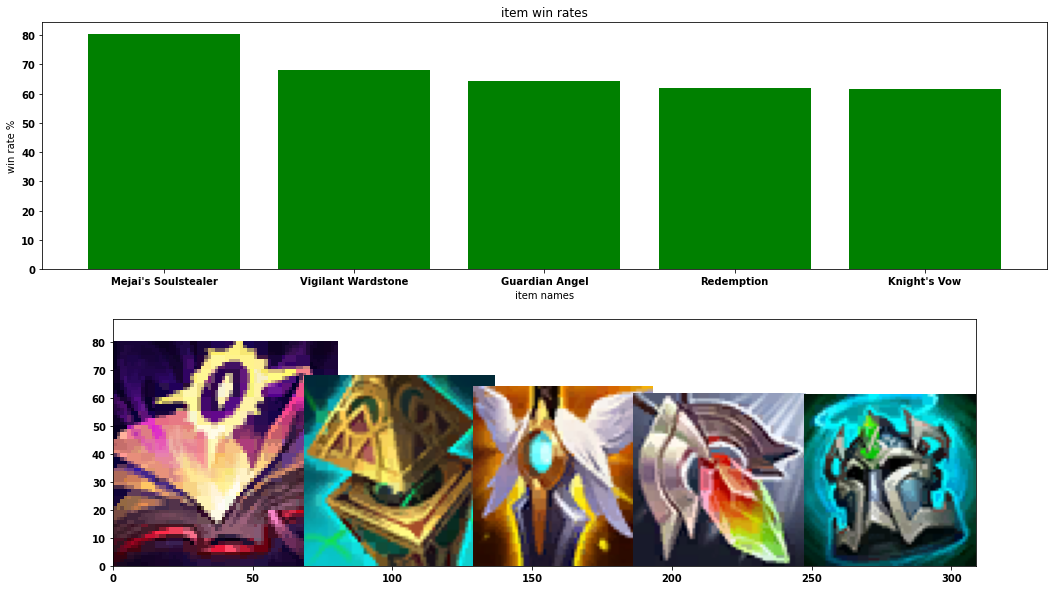

In [ ]:
top5 = df.sort_values('itemWinRate%', ascending=False).iloc[:5]

x = top5['itemName']
values = top5['itemWinRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'g', 0.8,['item win rates', 'item names', 'win rate %'],0.3)
plt.savefig('analysis_outputs/top5_winning_items.png', dpi=300)


In [ ]:
df = pd.read_csv('analysis_outputs/req3_item_rates.csv').dropna().drop(['Unnamed: 0'], axis=1)
imgdf = pd.read_csv('data/complete_data/item_names_from_ddragon.csv').drop('Unnamed: 0', axis=1)
df  = df.merge(imgdf, on= 'itemIndex')
df.head()

itemIndex       itemName  ...           name     image
0       3858   Relic Shield  ...   Relic Shield  3858.png
1       3121   Fimbulwinter  ...   Fimbulwinter  3121.png
2       3057          Sheen  ...          Sheen  3057.png
3       1043    Recurve Bow  ...    Recurve Bow  1043.png
4       3179  Umbral Glaive  ...  Umbral Glaive  3179.png

[5 rows x 6 columns]

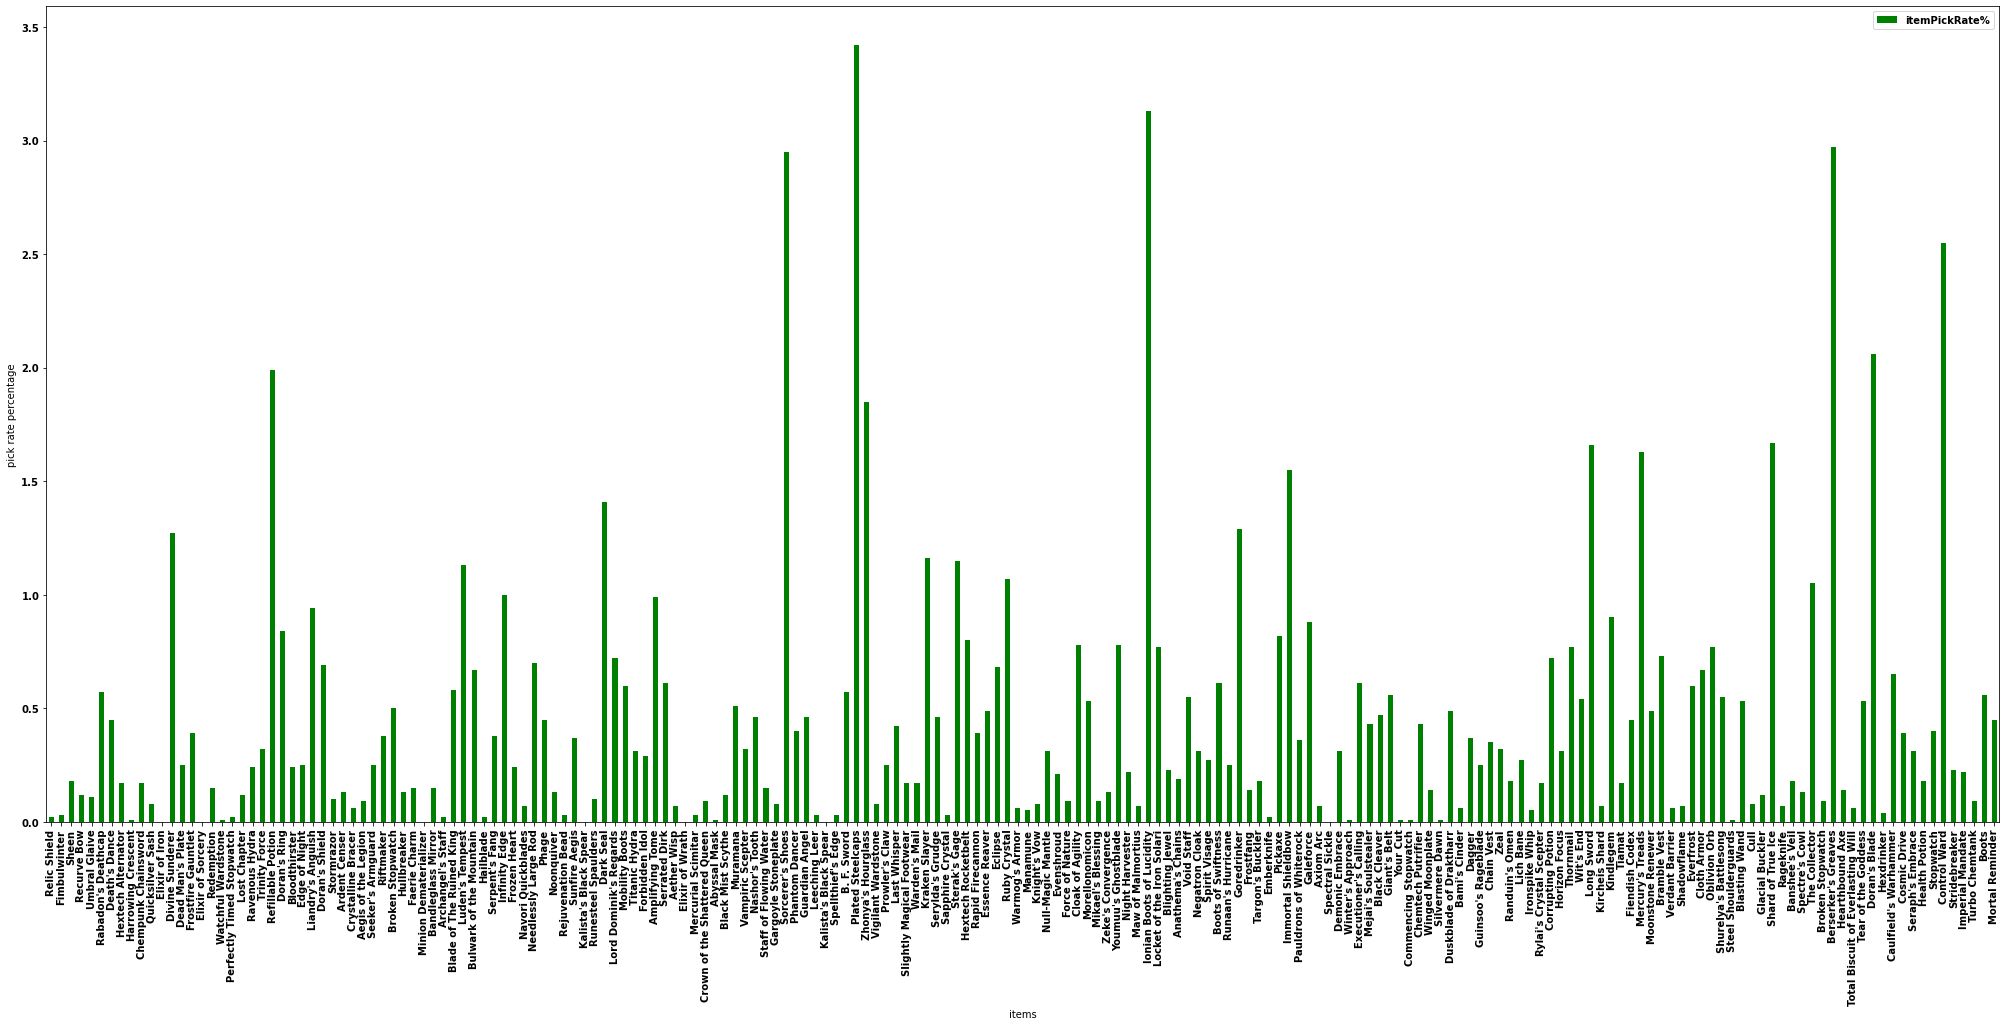

In [ ]:
ax =df.plot(x='itemName', y='itemPickRate%', kind="bar",figsize=(35,15), color ='green')
plt.savefig('analysis_outputs/item_pickRate.png', dpi=300)
ax.set_xlabel("items")
ax.set_ylabel("pick rate percentage")
plt.show()

In [ ]:
# top 5 most picked champions
top5 = df.sort_values('itemPickRate%', ascending=False).iloc[:5]
top5

itemIndex                  itemName  ...                      name     image
80        3047          Plated Steelcaps  ...          Plated Steelcaps  3047.png
109       3158  Ionian Boots of Lucidity  ...  Ionian Boots of Lucidity  3158.png
177       3006       Berserker's Greaves  ...       Berserker's Greaves  3006.png
73        3020          Sorcerer's Shoes  ...          Sorcerer's Shoes  3020.png
188       2055              Control Ward  ...              Control Ward  2055.png

[5 rows x 6 columns]

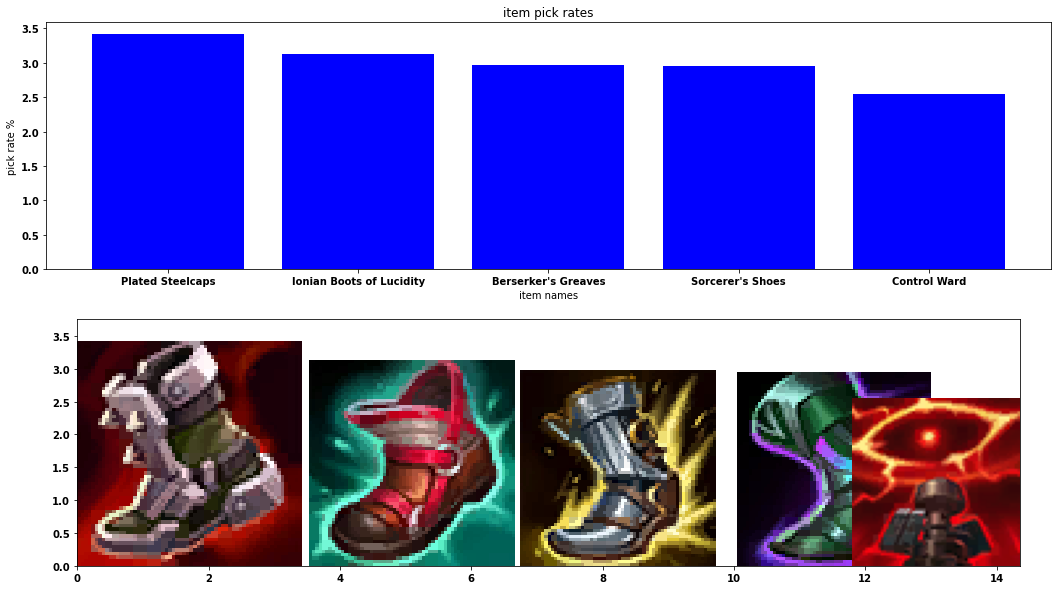

In [ ]:
x = top5['itemName']
values = top5['itemPickRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'b', 0.8, ['item pick rates', 'item names', 'pick rate %'],0.4)
plt.savefig('analysis_outputs/top5_picked_items.png', dpi=300)


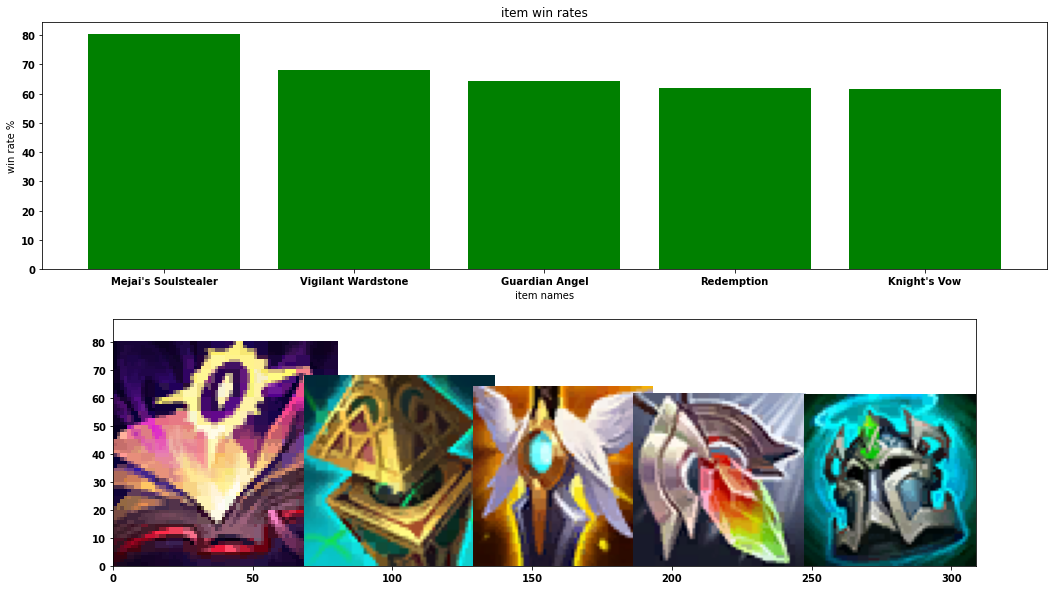

In [ ]:
top5 = df.sort_values('itemWinRate%', ascending=False).iloc[:5]

x = top5['itemName']
values = top5['itemWinRate%']
images = top5['image']
images = [imread('data/complete_data/data_dragon/item_images/'+i) for i in images]

bar_plot_with_images(x,values, 'g', 0.8,['item win rates', 'item names', 'win rate %'],0.3)
plt.savefig('analysis_outputs/top5_winning_items.png', dpi=300)


# REQUIREMENT 4: ITEM SYNERGIES




In [89]:
df = pd.read_csv('analysis_outputs/req41_Item_champ_synergy.csv').dropna().drop(['Unnamed: 0'], axis=1).sort_values('chSynergy', ascending=False)

df.head()

itemIndex championName                itemName  chSynergy  chItemPick
4918        3110       Kennen            Frozen Heart      100.0        0.00
10873       6691     Kassadin  Duskblade of Draktharr      100.0        0.00
10852       3065     Kassadin           Spirit Visage      100.0        0.01
1745        3024      Camille         Glacial Buckler      100.0        0.00
10866       3508     Kassadin          Essence Reaver      100.0        0.00

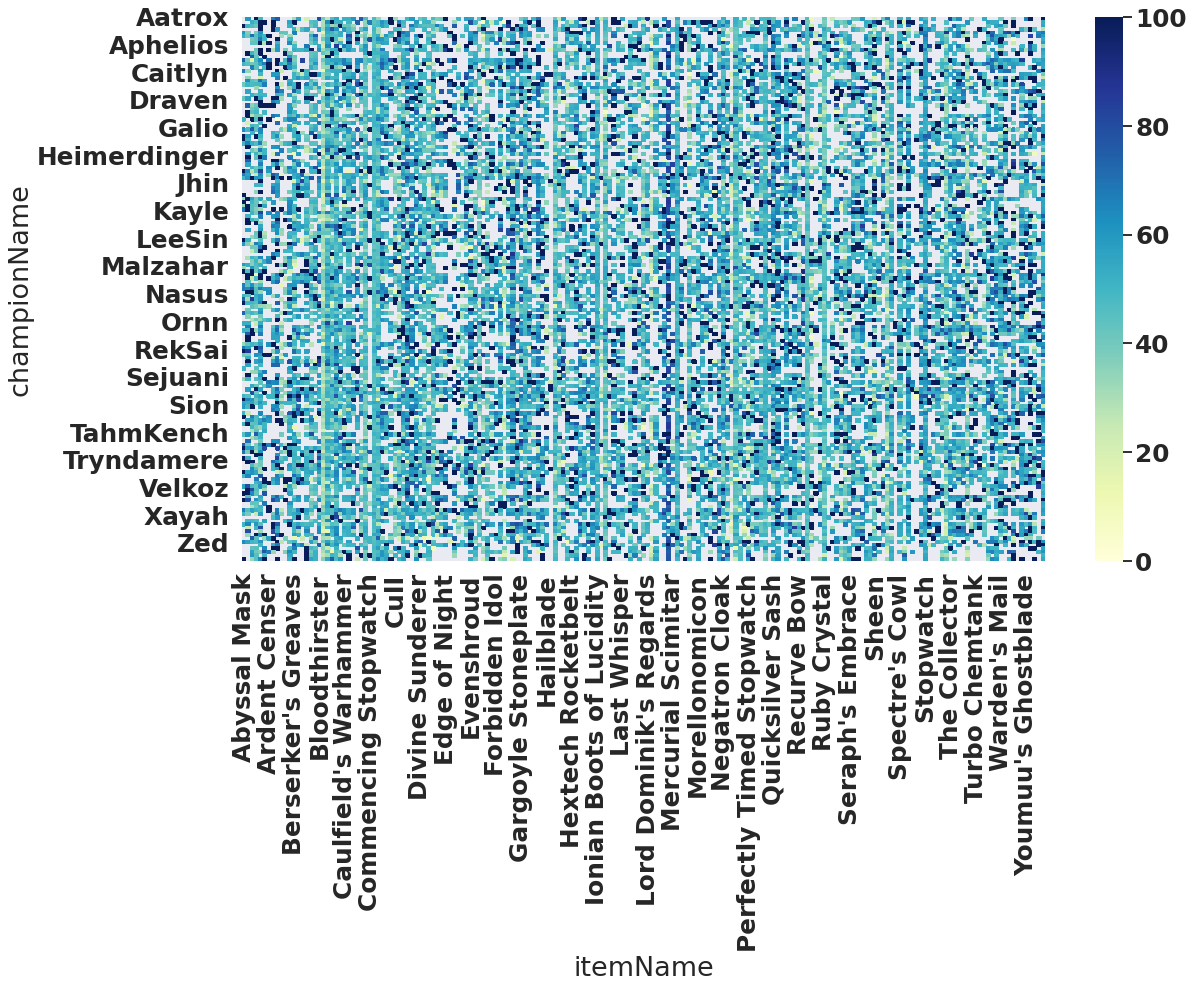

<Figure size 3240x576 with 0 Axes>

In [90]:
# visualize synergy as heat map
result = df.pivot_table(index='championName', columns='itemName', values='chSynergy', aggfunc = np.mean)
plt.figure(figsize=[18,10])
sn.heatmap(result, annot=False, vmin=0,vmax=100, cmap="YlGnBu")
plt.show()
plt.savefig('analysis_outputs/champ_item_synergy_heatmap.png', dpi=300)


In [70]:
# get the top 1000 best synergizing pairs
top5 = df.sort_values('chSynergy', ascending=False).iloc[:5]
top5

itemIndex championName            itemName  chSynergy  chItemPick
4918       3110       Kennen        Frozen Heart      100.0         0.0
656        1082     Pantheon           Dark Seal      100.0         0.0
8407       3050          Zed  Zeke's Convergence      100.0         0.0
8405       4636          Zed     Night Harvester      100.0         0.0
8404       3107          Zed          Redemption      100.0         0.0

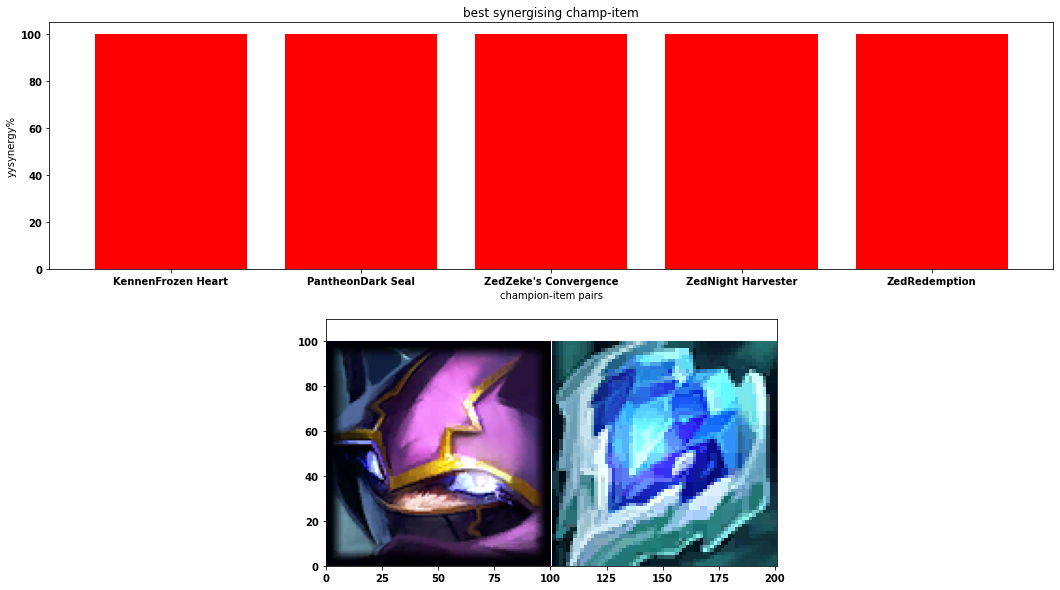

In [71]:
x = top5['championName'] + top5['itemName']
values = top5['chSynergy']
ims= [df.iloc[0]['championName']+'.png']#, df.iloc[1]['itemName']+'.png' ]

images = [imread('data/complete_data/data_dragon/champion_images/'+ df.iloc[0]['championName']+'.png'),  imread('data/complete_data/data_dragon/item_images/'+ str(df.iloc[0]['itemIndex'])+'.png')]

bar_plot_with_images(x, values, 'r', 0.8, ['best synergising champ-item', 'champion-item pairs', 'yysynergy%'],0.8)
#plt.title(f'best synergy duo: Garen & Akshan')

plt.savefig('analysis_outputs/best_synergy_item_champ.png', dpi=300)


In [72]:
# least synergyising champion-item pairs (counter)
top5 = df.sort_values('chSynergy').iloc[:5]
top5

itemIndex  championName          itemName  chSynergy  chItemPick
14328       1038  FiddleSticks       B. F. Sword        3.0        0.12
6410        1053   TwistedFate  Vampiric Scepter        5.0        0.08
10361       1036          Ekko        Long Sword        6.0        0.03
7780        1027         Shaco  Sapphire Crystal        6.0        0.05
467         3851          Ahri         Frostfang        6.0        0.06

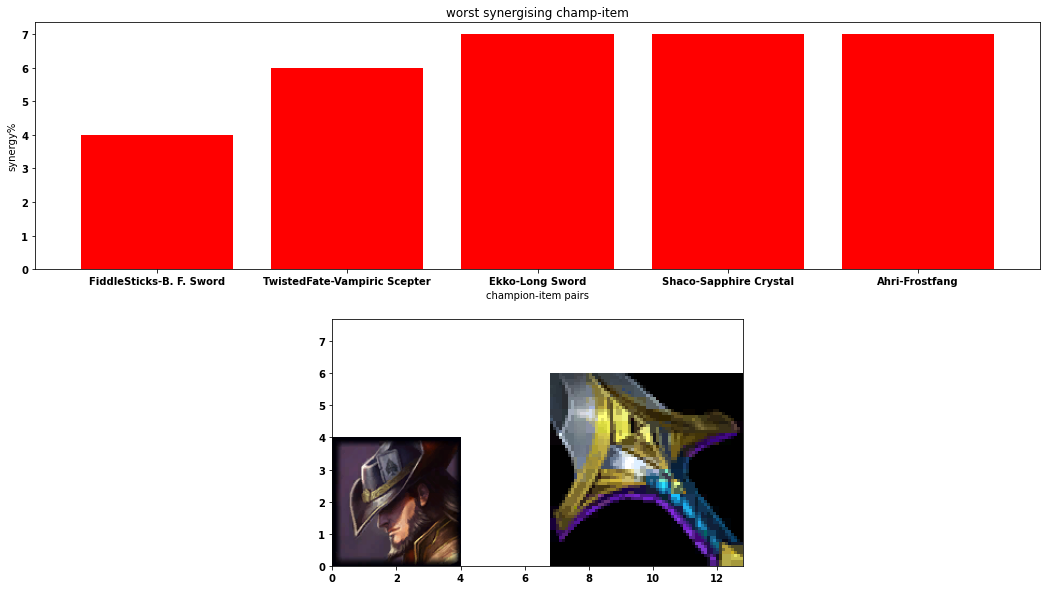

In [73]:

x = top5['championName'] + '-' + top5['itemName']
values = top5['chSynergy']
ims= [df.iloc[0]['championName']+'.png']#, df.iloc[1]['itemName']+'.png' ]

images = [imread('data/complete_data/data_dragon/champion_images/'+ df.iloc[-2]['championName']+'.png'),  imread('data/complete_data/data_dragon/item_images/'+ str(df.iloc[-1]['itemIndex'])+'.png')]

bar_plot_with_images(x, values+1, 'r', 0.8, ['worst synergising champ-item', 'champion-item pairs', 'synergy%'],0.8)

plt.savefig('analysis_outputs/worst_synergy_item_champ.png', dpi=300)


In [74]:
df = pd.read_csv('analysis_outputs/req42_Item_class_synergy.csv').dropna().drop(['Unnamed: 0'], axis=1).sort_values('clSynergy', ascending=False)

df.head()

itemIndex   chClass             itemName  clSynergy
429        3041   Fighter  Mejai's Soulstealer       84.0
113        3041      Tank  Mejai's Soulstealer       82.0
1000       3041  Assassin  Mejai's Soulstealer       81.0
402        3041      Mage  Mejai's Soulstealer       80.0
1084       3504  Marksman        Ardent Censer       79.0

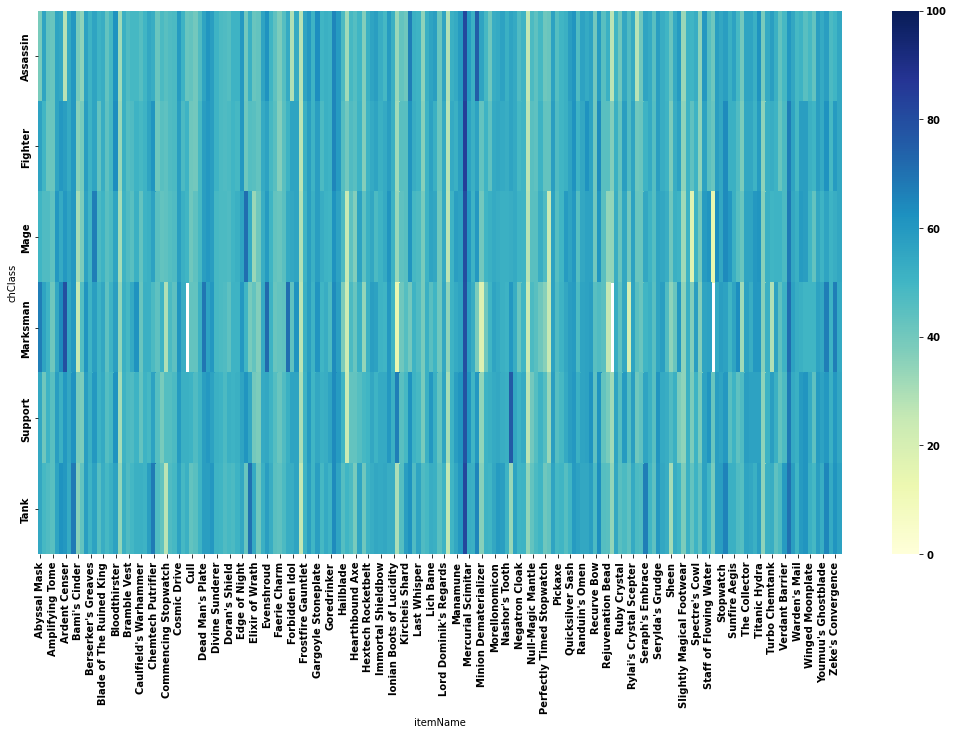

<Figure size 432x288 with 0 Axes>

In [76]:
# visualize synergy as heat map
result = df.pivot_table(index='chClass', columns='itemName', values='clSynergy', aggfunc = np.mean)
plt.figure(figsize=[18,10])
sn.heatmap(result, annot=False, vmin=0,vmax=100, cmap="YlGnBu")
plt.show()
plt.savefig('analysis_outputs/class_item_synergy_heatmap.png', dpi=300)


In [77]:
# get the top 1000 best synergizing pairs
top5 = df.sort_values('clSynergy', ascending=False).iloc[:5]
top5

itemIndex   chClass             itemName  clSynergy
429        3041   Fighter  Mejai's Soulstealer       84.0
113        3041      Tank  Mejai's Soulstealer       82.0
1000       3041  Assassin  Mejai's Soulstealer       81.0
402        3041      Mage  Mejai's Soulstealer       80.0
1084       3504  Marksman        Ardent Censer       79.0

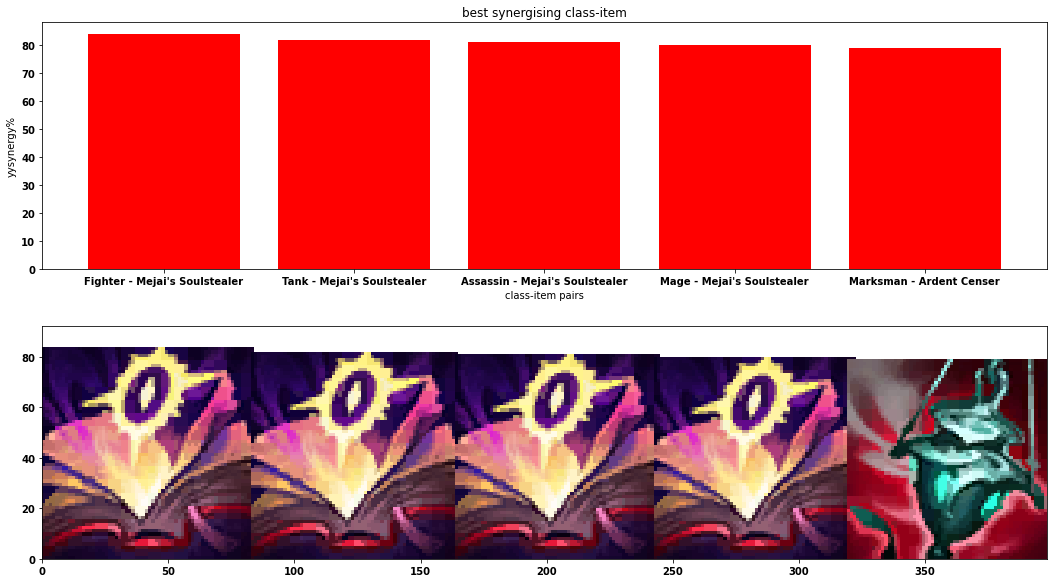

In [78]:
x = top5['chClass'] + ' - '+ top5['itemName']
values = top5['clSynergy']
ims= [str(im) +'.png' for im in list(df.iloc[0:5]['itemIndex'])]#, df.iloc[1]['itemName']+'.png' ]

images = [imread('data/complete_data/data_dragon/item_images/'+ i) for i in ims]

bar_plot_with_images(x, values, 'r', 0.8, ['best synergising class-item', 'class-item pairs', 'yysynergy%'],0.8)
#plt.title(f'best synergy duo: Garen & Akshan')

plt.savefig('analysis_outputs/best_synergy_item_class.png', dpi=300)


In [79]:
# least synergyising champion-item pairs (counter)
top5 = df.sort_values('clSynergy').iloc[:5]
top5

itemIndex   chClass               itemName  clSynergy
358       6029  Marksman         Ironspike Whip       14.0
802       3854      Mage   Steel Shoulderguards       14.0
0         3862      Mage        Spectral Sickle       17.0
775       2403  Marksman  Minion Dematerializer       18.0
588       3855  Marksman    Runesteel Spaulders       20.0

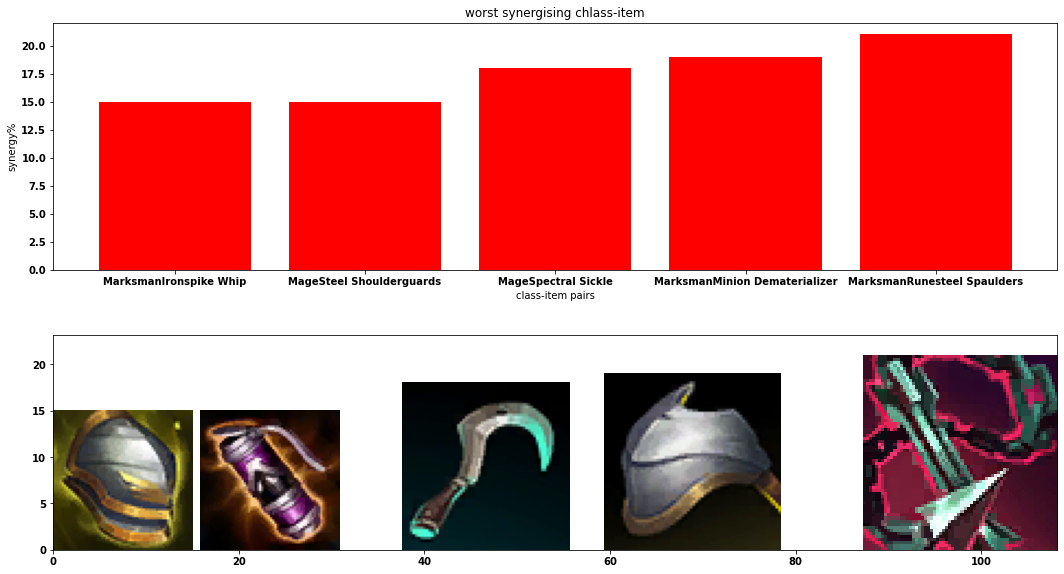

In [84]:
x = top5['chClass'] + top5['itemName']
values = top5['clSynergy']

ims= [str(im) +'.png' for im in list(df.iloc[-5:]['itemIndex'])]#, df.iloc[1]['itemName']+'.png' ]
images = [imread('data/complete_data/data_dragon/item_images/'+ i) for i in ims]

bar_plot_with_images(x, values+1, 'r', 0.8, ['worst synergising chlass-item', 'class-item pairs', 'synergy%'],0.8)

plt.savefig('analysis_outputs/worst_synergy_item_class.png', dpi=300)

# Requirement 5:

In [ ]:
#We thought about plotting the heuristics we calculated for each item, but then thought it's useless
# since we are not sure about the heuristic itslef, and have no idea about its distribution, nothing else can be plotted here.

#EXTRA REQUIREMENT 2: BEST LANE FOR EVERY CHAMPION

In [85]:
df = pd.read_csv('analysis_outputs/extra_req_best_lane_per_champ.csv').dropna().drop(['Unnamed: 0'], axis=1)
df_dist = pd.read_csv('analysis_outputs/champ_winrate_over_lanes_disribution.csv')
df.head()

championName    lane  winRate%
0       RekSai  JUNGLE     44.73
1    Gangplank     TOP     31.03
2      Kalista  BOTTOM     33.31
3         Rell  BOTTOM     41.26
4         Ahri  MIDDLE     38.60

In [86]:
min(df['winRate%']), max(df['winRate%'])

(17.39, 45.27)

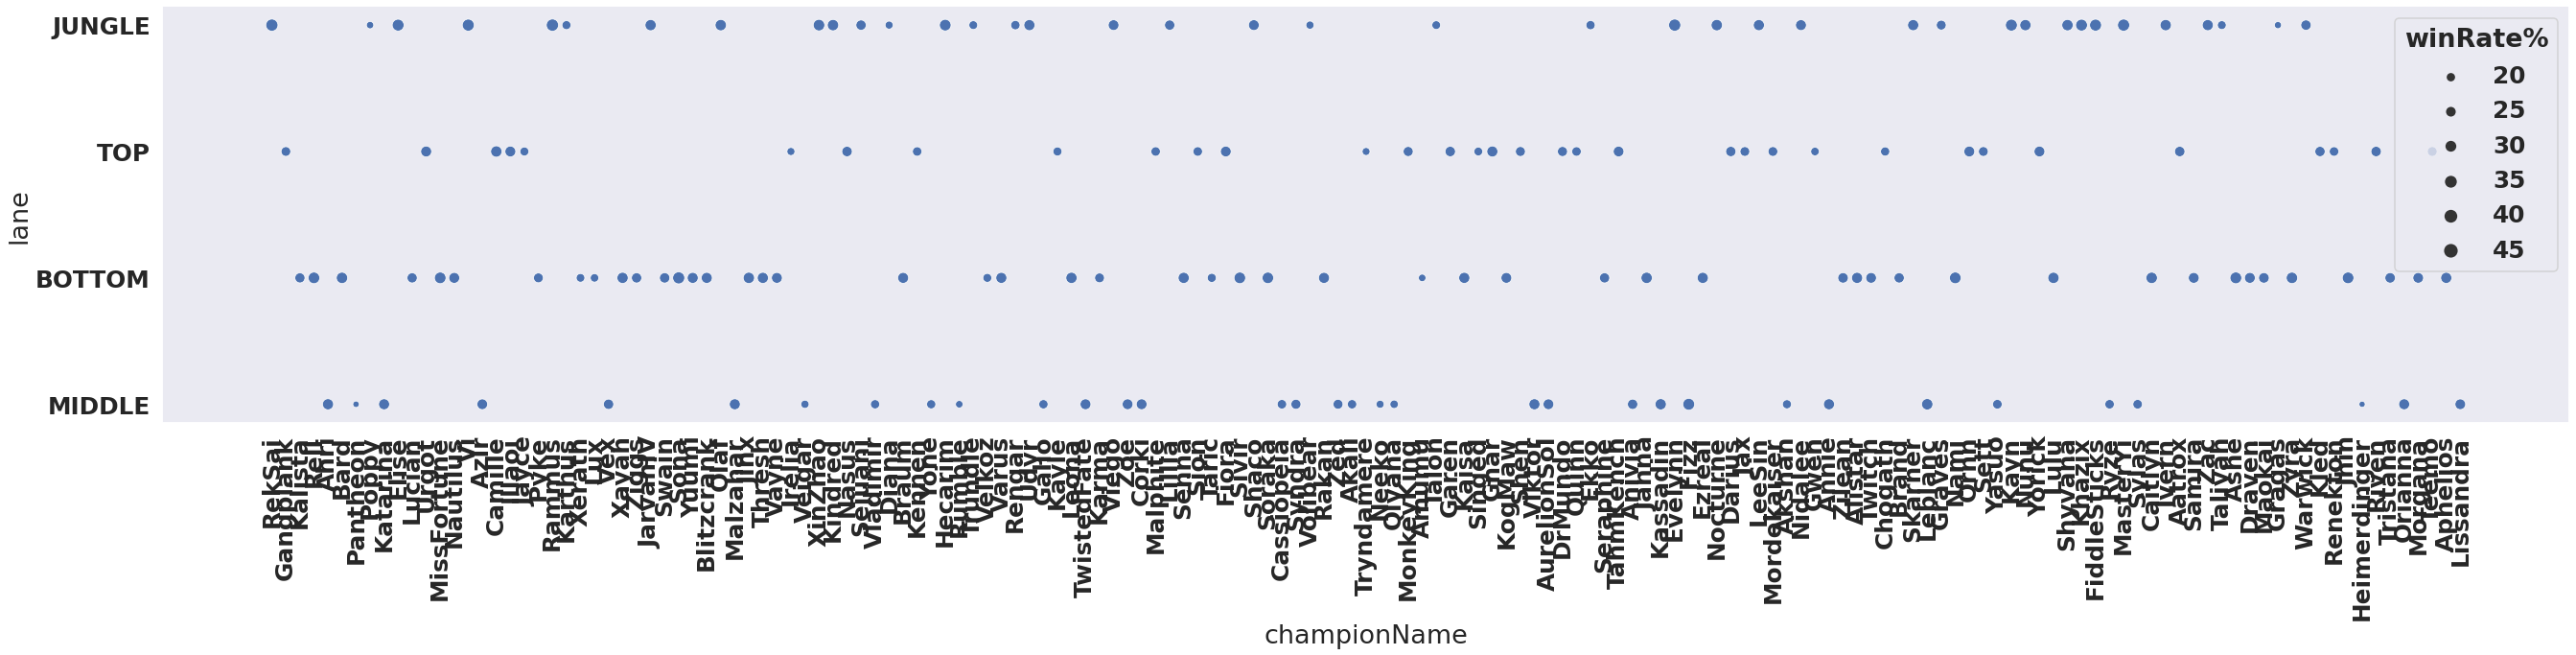

In [87]:
import matplotlib as mpl
sn.set(rc={'figure.figsize':(45,8)})
sn.set_context("talk", font_scale=1.5)
sn.set_style("dark")
cmap1 = mpl.colors.ListedColormap(sn.color_palette("Spectral"))

sn.scatterplot(data=df, x="championName", y="lane", size="winRate%", palette='colorblind')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
# show the graph
plt.savefig('analysis_outputs/best_lane_per_champ.png', dpi=300)

plt.show()

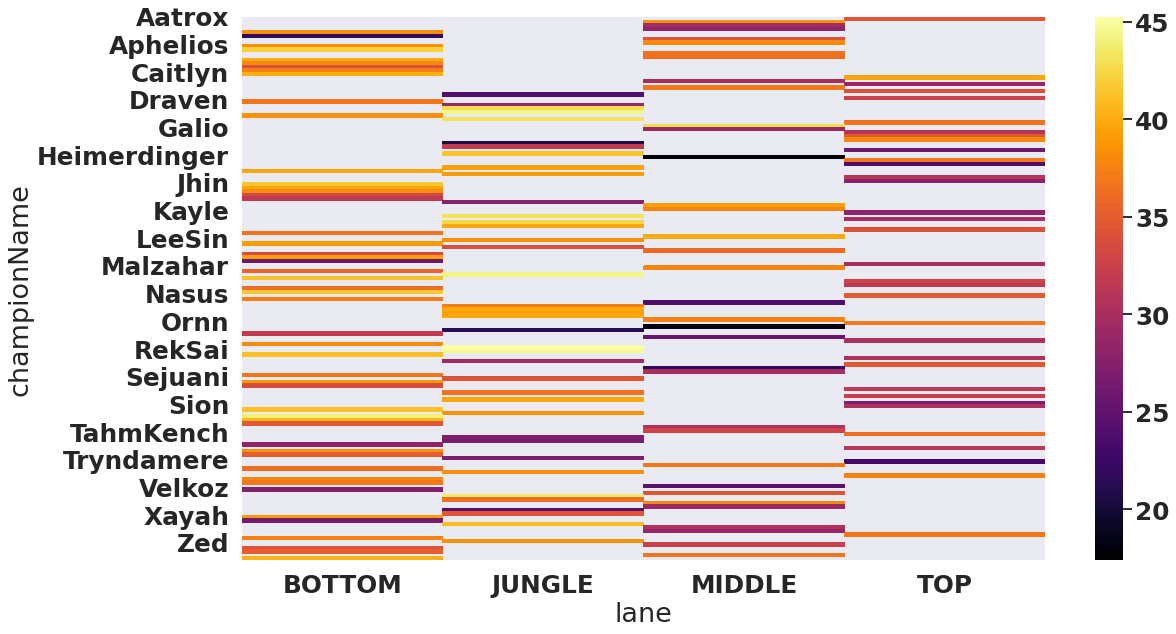

<Figure size 3240x576 with 0 Axes>

In [88]:
# visualize synergy as heat map
result = df_dist.pivot(index='championName', columns='lane', values='winRate%')
plt.figure(figsize=[18,10])
sn.heatmap(result, annot=False, cmap="inferno")
plt.show()
plt.savefig('analysis_outputs/champ_lane_winrate_heatmap.png', dpi=300)
